In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
import os 
os.environ["PATH"] += os.pathsep + '/usr/local/bin'
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [3]:
eom = pd.read_csv("../../data/1550/eom/eom.csv", decimal=",")
eom.head()

,voltage,optical power
0,0.0,14.46
1,0.1,13.82
2,0.2,13.08
3,0.3,12.30
4,0.4,11.50


In [4]:
def cossine_eom(voltage, omega, phi, A, D):
    return A*np.cos(omega*voltage+phi)+D

In [5]:
ans, _ = curve_fit(cossine_eom, eom["voltage"].values, eom["optical power"].values, p0=[0, np.pi/4, 7.5, 10])

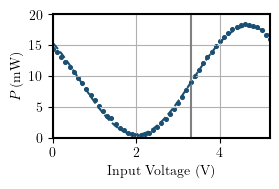

In [10]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
factor = 0.4
fig.set_size_inches(7*factor, 4*factor, forward=True)

plt.plot([3.3, 3.3],[-5, 40], color="gray")

plt.scatter(eom["voltage"].values, eom["optical power"].values, s=7, color=colors[2])
plt.plot(eom["voltage"].values, cossine_eom(eom["voltage"].values, *ans), color=colors[2], linestyle='dashed')


plt.xlabel(r'Input Voltage (V)')
plt.ylabel(r'$P \,(\textrm{mW})$')

plt.ylim([0, 20])
plt.xlim([eom["voltage"].values.min(), eom["voltage"].values.max()])
plt.grid()

plt.savefig('../../plots/Chapter 5/eom.pdf', dpi=300, bbox_inches = 'tight')

In [39]:
df = pd.read_csv('../../data/1550/eom/bias-tee-characterization.csv', decimal=',')
df.tail()

,freq,mag,delay,period,phase,mag_log
34,600000,1.0,0.0,0.000002,0.0,0.0
35,700000,1.0,0.0,0.000001,0.0,0.0
36,800000,1.0,0.0,0.000001,0.0,0.0
37,900000,1.0,0.0,0.000001,0.0,0.0
38,1000000,1.0,0.0,0.000001,0.0,0.0


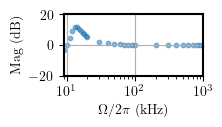

In [53]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
factor = 0.4
fig.set_size_inches(4.5*factor, 2*factor, forward=True)

#plt.plot([3.3, 3.3],[-5, 40], color="gray")

#plt.scatter(eom["voltage"].values, eom["optical power"].values, s=7, color=colors[2])
#plt.plot(eom["voltage"].values, cossine_eom(eom["voltage"].values, *ans), color=colors[2], linestyle='dashed')
plt.scatter(df['freq'].values/1e3, df['mag_log'].values.astype('float'), s=10, alpha=0.5)
#plt.yticks([-40, -20, 0, 20])
plt.xscale('log')
plt.xlim([9, 1000])
plt.ylim([-20, 20])
plt.xlabel(r'$\Omega/2\pi$ (kHz)')
plt.ylabel(r'Mag (dB)')

#plt.xlim([eom["voltage"].values.min(), eom["voltage"].values.max()])
plt.grid()

plt.savefig('../../plots/Chapter 5/bias_tee_behavior.pdf', dpi=300, bbox_inches = 'tight')
plt.show()